## Preprocessing
- Loaded raw AAPL data from 'raw_AAPL.csv', skipping the 'Price' row and renaming columns to 'Close', 'High', 'Low', 'Open', 'Volume'.
- Engineered features: 7-day moving average (MA_7), 1-day lag (Lag_1), and RSI (using ta-lib).
- Normalized features to [0,1] using MinMaxScaler.
- Split data chronologically: 70% train, 15% val, 15% test.
- Saved processed datasets to data/ and correlation heatmap to reports/.
- **Note**: Fixed column naming due to CSV header misalignment.

In [19]:

!pip install TA-Lib

import pandas as pd
import ta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [7]:
# Load data, skipping the initial header rows and setting Date as index
df = pd.read_csv('/content/raw_AAPL.csv', skiprows=2, index_col=0, parse_dates=True)

In [9]:
# Debug: Inspect the loaded DataFrame
print("Columns:", df.columns)
print("Index:", df.index)

Columns: Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], dtype='object')
Index: DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2025-08-14', '2025-08-15', '2025-08-18', '2025-08-19',
               '2025-08-20', '2025-08-21', '2025-08-22', '2025-08-25',
               '2025-08-26', '2025-08-27'],
              dtype='datetime64[ns]', name='Date', length=1421, freq=None)


In [10]:
# Rename columns based on the expected structure (adjust if misaligned)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']  # Match the CSV data order

In [11]:
# Verify renamed columns
print("Renamed Columns:", df.columns)

Renamed Columns: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [12]:
# Verify renamed columns
print("Renamed Columns:", df.columns)

# Feature engineering
df['MA_7'] = df['Close'].rolling(7).mean()
df['Lag_1'] = df['Close'].shift(1)
df['RSI'] = ta.momentum.RSIIndicator(df['Close']).rsi()

Renamed Columns: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [14]:
#Select features for scaling
features = ['Close', 'Volume', 'MA_7', 'Lag_1', 'RSI']  # Adjusted to available columns
df = df[features].copy()  # Work with selected columns only

# Handle NaN values (from rolling and shift)
df = df.fillna(0)  # Replace NaN with 0 (simplistic; adjust if needed)

In [15]:
# Normalize features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Split data (chronological split: 70% train, 15% val, 15% test)
train_size = int(0.7 * len(df))
val_size = int(0.15 * len(df))
train = df[:train_size]
val = df[train_size:train_size + val_size]
test = df[train_size + val_size:]

In [16]:
# Save datasets to downloadable files
train.to_csv('train_AAPL.csv')
val.to_csv('val_AAPL.csv')
test.to_csv('test_AAPL.csv')
from google.colab import files
files.download('train_AAPL.csv')
files.download('val_AAPL.csv')
files.download('test_AAPL.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

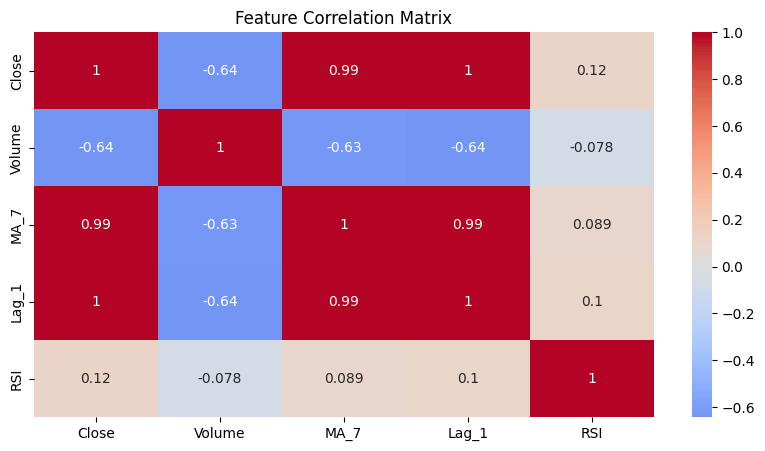

In [17]:
# Visualize correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()  # Display plot; save manually

In [18]:
# Documentation
print(f"Train Shape: {train.shape}, Val Shape: {val.shape}, Test Shape: {test.shape}")
display(df[features].describe())

Train Shape: (994, 5), Val Shape: (213, 5), Test Shape: (214, 5)


,Close,Volume,MA_7,Lag_1,RSI
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.514679,0.157443,0.623970,0.616184,0.651708
std,0.220013,0.128563,0.179493,0.174327,0.159958
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372643,0.072534,0.510357,0.504124,0.539741
50%,0.514804,0.123062,0.627215,0.615536,0.656447
75%,0.664015,0.197916,0.743675,0.733111,0.772395
max,1.000000,1.000000,1.000000,1.000000,1.000000
